In [1]:
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

from clasificacion_humedales.utils.compare import *
from clasificacion_humedales.utils.utils_maia import load_from_file, read_clustering, directories, save_in_file

Cargamos nuestros clusterings

In [2]:
PATH_IN, PATH_OUT = directories()

map_gt = load_from_file(PATH_OUT + 'clustering_gt/mapa_gt_clustered.pkl').flatten()

agglomerative_pca = load_from_file(PATH_OUT + 'agglomerative/agglomerative_pca_ward.pkl')
agglomerative_dates = load_from_file(PATH_OUT + 'agglomerative/agglomerative_dates_ward.pkl')

Cargamos la historia del agglomerative clustering (hay que haber corrido primero el notebook "agglomerative" para que esto funcione)

In [7]:
clustering_history_pca = generate_clustering_history(agglomerative_pca, 'agglomerative/agglomerative_pca')
clustering_history_dates = generate_clustering_history(agglomerative_dates, 'agglomerative/agglomerative_dates')

In [8]:
np.array(clustering_history_pca).shape

(49, 189029)

In [9]:
print(np.argmax(compare_clusters(map_gt, clustering_history_pca, metrics.adjusted_rand_score)))


34


In [10]:
print(np.argmax(compare_clusters(map_gt, clustering_history_dates, metrics.adjusted_rand_score)))

10


Elegimos alguna iteración del agglomerative clustering para compararla con el mapa de coberturas y hacemos el heatmap

In [11]:
first_iteration_without_small_clusters(clustering_history_pca, 2)

(33, array([-3000, -3000, -3000, ..., -3000, -3000, -3000]))

In [12]:
first_iteration_without_small_clusters(clustering_history_dates, 2)

(0, array([-3000, -3000, -3000, ..., -3000, -3000, -3000]))

Comparamos el mapa GT con el mapa 2

In [13]:
clustering_1 = clustering_history_dates[10]
clustering_1_labels = np.delete(np.unique(clustering_1), 0)
clustering_1_title = 'Mapa 2'

clustering_2 = map_gt
clustering_2_labels = np.delete(np.unique(clustering_2), 0)
clustering_2_title = 'Mapa GT'

<AxesSubplot:xlabel='Mapa GT', ylabel='Mapa 2'>

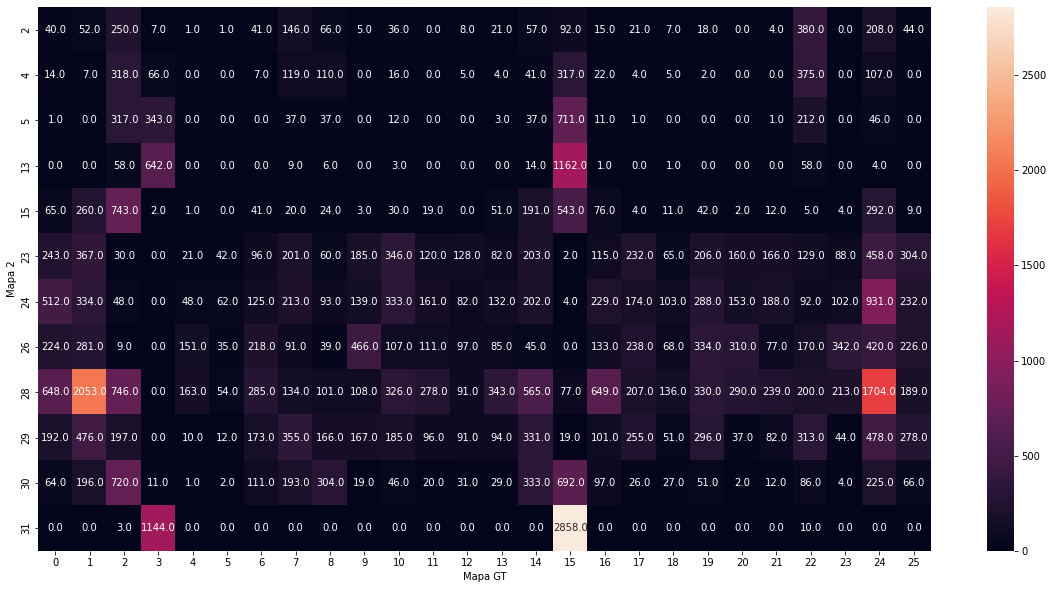

In [14]:
df = belonging_dataframe_absolute_values(clustering_1, clustering_1_labels, clustering_1_title, clustering_2, clustering_2_labels, clustering_2_title)
plot_heatmap(df)

In [15]:
clustering_1 = clustering_history_dates[10]
clustering_1_labels = np.delete(np.unique(clustering_1), 0)
clustering_1_title = 'Mapa 2'

clustering_2 = map_gt
clustering_2_labels = np.delete(np.unique(clustering_2), 0)
clustering_2_title = 'Mapa GT'

<AxesSubplot:xlabel='Mapa GT', ylabel='Mapa 2'>

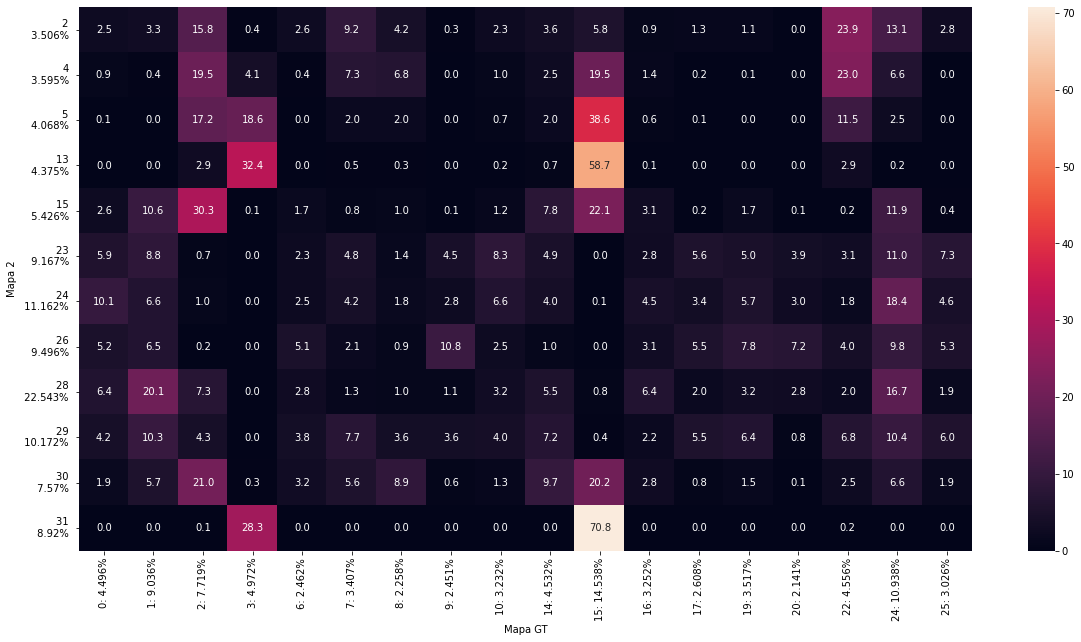

In [16]:
df = belonging_dataframe_percentages(clustering_1, clustering_1_labels, clustering_1_title, clustering_2, clustering_2_labels, clustering_2_title)
df = trimmed_and_ordered(df, index=1, clustering=clustering_2)

plot_heatmap(df, save_plot=True)

In [17]:
clustering_2 = clustering_history_dates[10]
clustering_2_labels = np.delete(np.unique(clustering_2), 0)
clustering_2_title = 'Mapa 2'

clustering_1 = map_gt
clustering_1_labels = np.delete(np.unique(clustering_1), 0)
clustering_1_title = 'Mapa GT'

<AxesSubplot:xlabel='Mapa 2', ylabel='Mapa GT'>

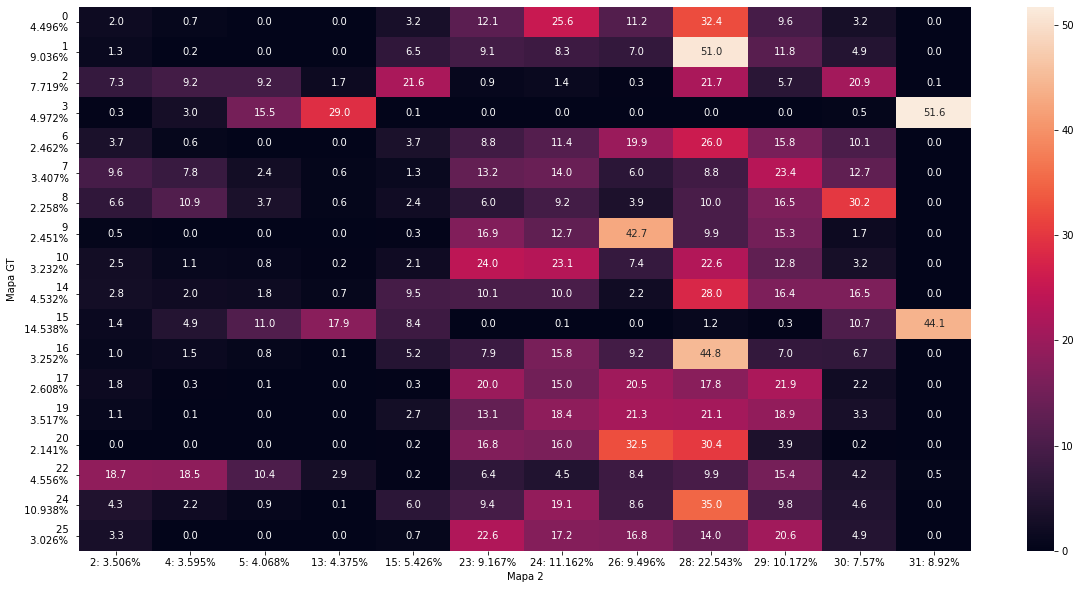

In [18]:
df = belonging_dataframe_percentages(clustering_1, clustering_1_labels, clustering_1_title, clustering_2, clustering_2_labels, clustering_2_title)
df = trimmed_and_ordered(df, index=0, clustering=clustering_1)

plot_heatmap(df, save_plot=True)

Comparamos el mapa GT con el mapa 1

In [19]:
clustering_1 = clustering_history_pca[34]
clustering_1_labels = np.delete(np.unique(clustering_1), 0)
clustering_1_title = 'Mapa 1'

clustering_2 = map_gt
clustering_2_labels = np.delete(np.unique(clustering_2), 0)
clustering_2_title = 'Mapa GT'

<AxesSubplot:xlabel='Mapa GT', ylabel='Mapa 1'>

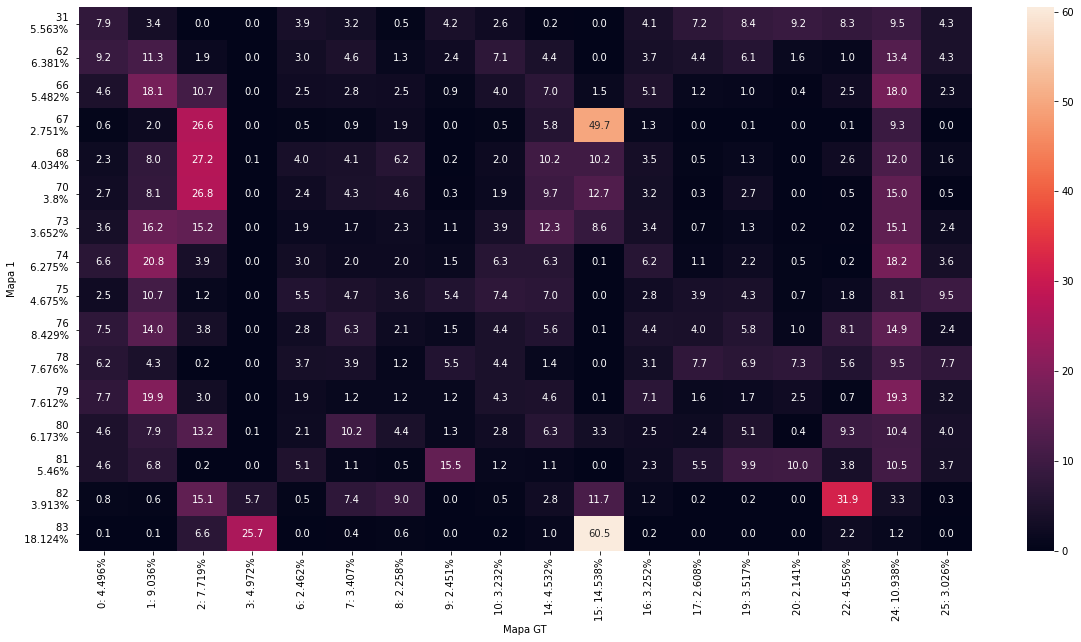

In [20]:
df = belonging_dataframe_percentages(clustering_1, clustering_1_labels, clustering_1_title, clustering_2, clustering_2_labels, clustering_2_title)
df = trimmed_and_ordered(df, index=1, clustering=clustering_2)

plot_heatmap(df, save_plot=True)

In [21]:
clustering_2 = clustering_history_pca[34]
clustering_2_labels = np.delete(np.unique(clustering_2), 0)
clustering_2_title = 'Mapa 1'

clustering_1 = map_gt
clustering_1_labels = np.delete(np.unique(clustering_1), 0)
clustering_1_title = 'Mapa GT'

<AxesSubplot:xlabel='Mapa 1', ylabel='Mapa GT'>

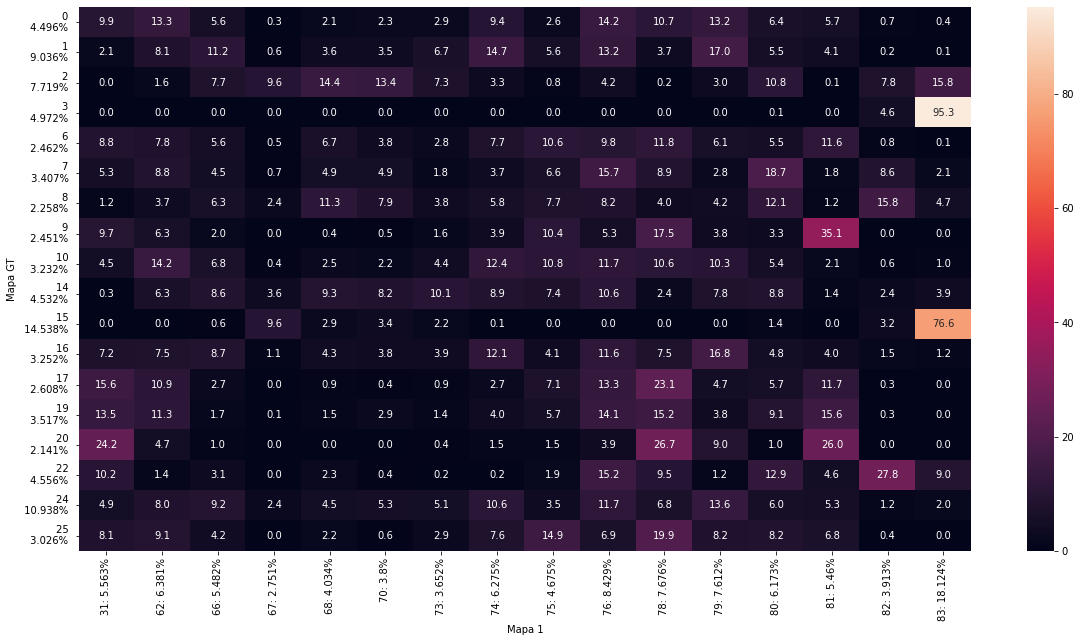

In [22]:
df = belonging_dataframe_percentages(clustering_1, clustering_1_labels, clustering_1_title, clustering_2, clustering_2_labels, clustering_2_title)
df = trimmed_and_ordered(df, index=0, clustering=clustering_1)

plot_heatmap(df, save_plot=True)